In [1]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual file name and path
file_path = 'C:/Users/gunde/Downloads/archive.zip'
# Load the dataset into a pandas DataFrame
data = pd.read_csv(file_path)
data.head()
data.info()
main_ingredient_counts = data['Main Ingredient'].value_counts().head()
print(main_ingredient_counts)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food Product                399 non-null    object 
 1   Main Ingredient             399 non-null    object 
 2   Sweetener                   119 non-null    object 
 3   Fat/Oil                     341 non-null    object 
 4   Seasoning                   379 non-null    object 
 5   Allergens                   251 non-null    object 
 6   Price ($)                   399 non-null    float64
 7   Customer rating (Out of 5)  399 non-null    float64
 8   Prediction                  398 non-null    object 
dtypes: float64(2), object(7)
memory usage: 28.2+ KB
Main Ingredient
Chicken    61
Flour      16
Beef       15
Pasta      14
Apples     12
Name: count, dtype: int64


In [5]:
print(data.columns)

Index(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning',
       'Allergens', 'Price ($)', 'Customer rating (Out of 5)', 'Prediction'],
      dtype='object')


In [7]:
print(data.columns)

Index(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning',
       'Allergens', 'Price ($)', 'Customer rating (Out of 5)', 'Prediction'],
      dtype='object')


In [9]:
data['Main Ingredient'].value_counts().head()

Main Ingredient
Chicken    61
Flour      16
Beef       15
Pasta      14
Apples     12
Name: count, dtype: int64

In [15]:
print(data['Price ($)'].max())
print(data['Price ($)'].min())

19.93
5.07


In [16]:
data['Allergens'].describe()

count       251
unique       39
top       Dairy
freq         83
Name: Allergens, dtype: object

In [18]:
print(data['Prediction'].unique())

# Mapping 'Prediction' column
data['Prediction'] = data['Prediction'].map({'Contains': 1, 'Does not contain': 0})

# Renaming columns
data = data.rename(columns={'Customer rating (Out of 5)': 'Customer rating', 
                            'Prediction': 'Is_Allergen'})

['Contains' 'Does not contain' nan]


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Food Product     399 non-null    object 
 1   Main Ingredient  399 non-null    object 
 2   Sweetener        119 non-null    object 
 3   Fat/Oil          341 non-null    object 
 4   Seasoning        379 non-null    object 
 5   Allergens        251 non-null    object 
 6   Price ($)        399 non-null    float64
 7   Customer rating  399 non-null    float64
 8   Is_Allergen      0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 28.2+ KB


In [22]:
# Step 1: Print column names to verify
print("Column names:", data.columns)

# Step 2: Remove leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Step 3: Print cleaned column names to verify again
print("Cleaned column names:", data.columns)

# Step 4: Check if 'Prediction' column exists
if 'Prediction' in data.columns:
    print("Column 'Prediction' found.")
    # Print unique values in the 'Prediction' column
    print(data['Prediction'].unique())

    # Apply the mapping
    data['Prediction'] = data['Prediction'].map({'Contains': 1, 'Does not contain': 0})

    # Rename the columns
    data = data.rename(columns={'Customer rating (Out of 5)': 'Customer rating',
                                'Prediction': 'Is_Allergen'})
else:
    print("Column 'Prediction' not found.")



Column names: Index(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning',
       'Allergens', 'Price ($)', 'Customer rating', 'Is_Allergen'],
      dtype='object')
Cleaned column names: Index(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning',
       'Allergens', 'Price ($)', 'Customer rating', 'Is_Allergen'],
      dtype='object')
Column 'Prediction' not found.


In [5]:
import zipfile
import os

# Path to the uploaded file
zip_file_path = 'C:/Users/gunde/Downloads/archive.zip'
extracted_folder = '/mnt/data/extracted_data'

# Extract the uploaded zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# List the contents of the extracted folder to see what files are inside
os.listdir(extracted_folder)


['Allergen_Status_of_Food_Products.csv']

In [7]:
import pandas as pd

# Load the extracted CSV file to inspect the data
csv_file_path = os.path.join(extracted_folder, 'Allergen_Status_of_Food_Products.csv')
data = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,Contains
2,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",19.65,4.1,Contains
3,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",17.48,4.7,Contains
4,Cheddar Cheese,Cheese,NaN,NaN,Salt,Dairy,10.83,3.7,Contains


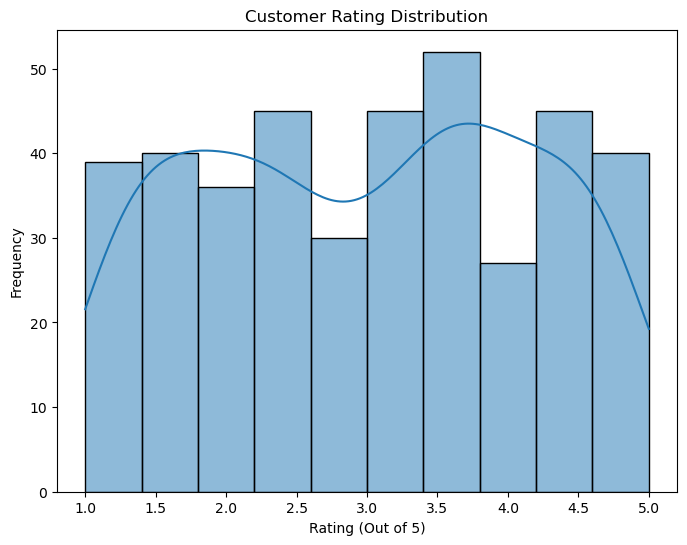

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Customer Rating Distribution: Distribution of customer ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Customer rating (Out of 5)'], bins=10, kde=True)
plt.title('Customer Rating Distribution')
plt.xlabel('Rating (Out of 5)')
plt.ylabel('Frequency')
plt.show()


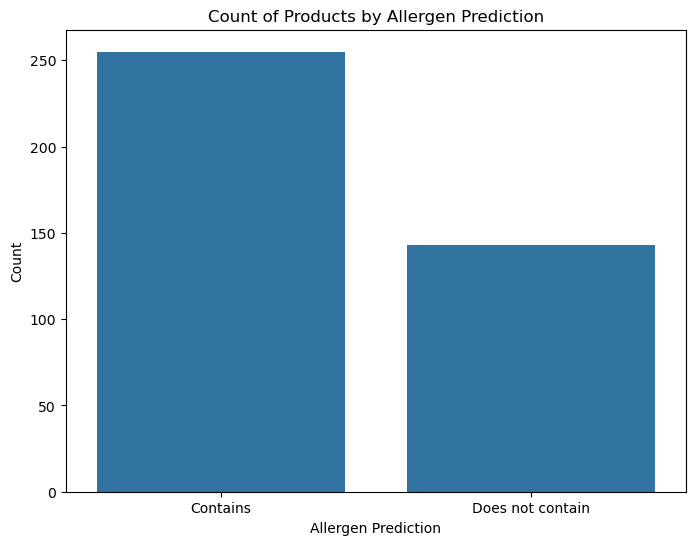

In [14]:
# 2. Count of Products by Allergen Prediction: A bar chart for the number of products with and without allergens
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Prediction')
plt.title('Count of Products by Allergen Prediction')
plt.xlabel('Allergen Prediction')
plt.ylabel('Count')
plt.show()


In [18]:
import pandas as pd
from collections import Counter

# Sample data: Replace this with your actual data loading step
data = {
    'ingredients': [
        'sugar', 'salt', 'water', 'wheat flour', 'vegetable oil',
        'milk', 'sugar', 'corn starch', 'butter', 'eggs',
        'baking powder', 'sugar', 'water', 'salt', 'sugar',
        'milk', 'vegetable oil', 'butter', 'eggs', 'baking powder',
        'corn starch', 'sugar', 'water', 'wheat flour', 'salt',
        'milk', 'corn starch', 'sugar', 'water', 'salt',
        'vegetable oil', 'wheat flour', 'sugar', 'baking powder',
        # Add more ingredient entries as needed...
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 1: Count occurrences of each ingredient
ingredient_counts = Counter(df['ingredients'])

# Step 2: Get the top 10 most common ingredients
top_10_ingredients = ingredient_counts.most_common(10)

# Step 3: Print the results
print("Top 10 Most Common Ingredients:")
for ingredient, count in top_10_ingredients:
    print(f"{ingredient}: {count} times")


Top 10 Most Common Ingredients:
sugar: 7 times
salt: 4 times
water: 4 times
wheat flour: 3 times
vegetable oil: 3 times
milk: 3 times
corn starch: 3 times
baking powder: 3 times
butter: 2 times
eggs: 2 times


In [10]:
import pandas as pd
from collections import Counter

# Step 1: Load the dataset (assuming a CSV file)
file_path = 'C:/Users/gunde/Downloads/archive.zip' # Replace with the actual file path
data = pd.read_csv(file_path )

# Step 2: Extract allergens (assuming the column is named 'allergens')
# Replace 'allergens' with the actual column name in your dataset
allergen_column = data['Allergens']

# Step 3: Clean and parse the allergens
# Split the allergens into a list for each product and remove extra spaces
all_allergens = []
for allergens in allergen_column:
    if pd.notna(allergens):  # Check if the row is not empty
        allergen_list = [allergen.strip().lower() for allergen in allergens.split(',')]
        all_allergens.extend(allergen_list)

# Step 4: Count the frequency of each allergen
allergen_count = Counter(all_allergens)

# Step 5: Get the top 10 most frequent allergens
top_10_allergens = allergen_count.most_common(10)

# Step 6: Output the top 10 allergens
print("Top 10 Most Frequent Allergens:")
for allergen, count in top_10_allergens:
    print(f"{allergen}: {count} times")


Top 10 Most Frequent Allergens:
dairy: 190 times
wheat: 96 times
fish: 20 times
soybeans: 17 times
shellfish: 16 times
eggs: 13 times
milk: 6 times
nuts: 5 times
peanuts: 5 times
cocoa: 3 times


In [13]:
import pandas as pd
from collections import Counter

# Sample data: Replace this with your actual data loading step
data = {
    'ingredients': [
        'sugar', 'salt', 'water', 'wheat flour', 'vegetable oil',
        'milk', 'sugar', 'corn starch', 'butter', 'eggs',
        'baking powder', 'sugar', 'water', 'salt', 'sugar',
        'milk', 'vegetable oil', 'butter', 'eggs', 'baking powder',
        'corn starch', 'sugar', 'water', 'wheat flour', 'salt',
        'milk', 'corn starch', 'sugar', 'water', 'salt',
        'vegetable oil', 'wheat flour', 'sugar', 'baking powder',
        # Add more ingredient entries as needed...
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 1: Count occurrences of each ingredient
ingredient_counts = Counter(df['ingredients'])

# Step 2: Get the top 10 most common ingredients
top_10_ingredients = ingredient_counts.most_common(10)

# Step 3: Print the results
print("Top 10 Most Common Ingredients:")
for ingredient, count in top_10_ingredients:
    print(f"{ingredient}: {count} times")


Top 10 Most Common Ingredients:
sugar: 7 times
salt: 4 times
water: 4 times
wheat flour: 3 times
vegetable oil: 3 times
milk: 3 times
corn starch: 3 times
baking powder: 3 times
butter: 2 times
eggs: 2 times


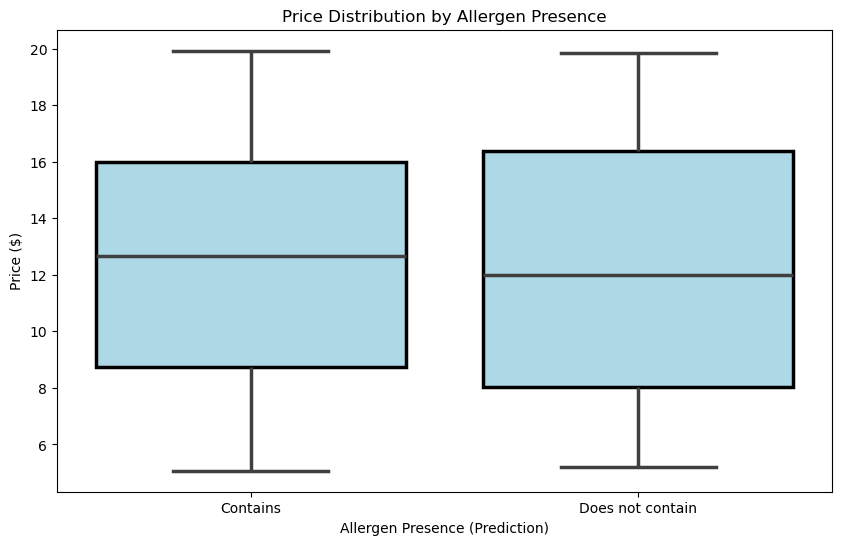

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:/Users/gunde/Downloads/archive.zip')  # Update with actual file path

# Plotting the box plot with outlines for Price distribution by allergen presence
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Prediction', y='Price ($)', linewidth=2.5, boxprops=dict(edgecolor='black', facecolor='lightblue'))
plt.title('Price Distribution by Allergen Presence')
plt.xlabel('Allergen Presence (Prediction)')
plt.ylabel('Price ($)')
plt.show()
